<a href="https://colab.research.google.com/github/viddev1/tensorflow_notebooks/blob/main/notebooks/tf_cnn_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-24 23:54:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 173.194.193.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  48.5MB/s    in 2.2s    

2022-05-24 23:54:46 (48.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train/

pizza  steak


In [6]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [7]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [8]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train


750

In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder+ "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


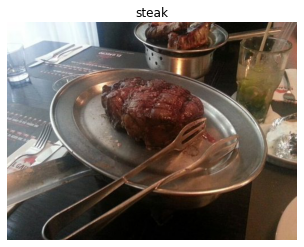

In [11]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [12]:
img, img.shape

(array([[[255, 253, 254],
         [255, 253, 254],
         [255, 253, 254],
         ...,
         [109,  95,  82],
         [114, 102,  88],
         [115, 103,  89]],
 
        [[255, 253, 254],
         [255, 253, 254],
         [255, 253, 254],
         ...,
         [105,  91,  78],
         [118, 104,  91],
         [122, 108,  95]],
 
        [[255, 253, 254],
         [255, 253, 254],
         [255, 253, 254],
         ...,
         [110,  94,  81],
         [126, 110,  97],
         [125, 109,  96]],
 
        ...,
 
        [[ 50,  64,  65],
         [ 48,  62,  63],
         [ 48,  62,  63],
         ...,
         [192, 150, 108],
         [192, 150, 108],
         [190, 148, 106]],
 
        [[ 51,  65,  65],
         [ 49,  63,  63],
         [ 52,  66,  66],
         ...,
         [192, 150, 108],
         [192, 150, 108],
         [190, 148, 106]],
 
        [[ 50,  65,  62],
         [ 46,  61,  58],
         [ 52,  67,  64],
         ...,
         [189, 147, 105],
  

In [13]:
img/255

array([[[1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        ...,
        [0.42745098, 0.37254902, 0.32156863],
        [0.44705882, 0.4       , 0.34509804],
        [0.45098039, 0.40392157, 0.34901961]],

       [[1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        ...,
        [0.41176471, 0.35686275, 0.30588235],
        [0.4627451 , 0.40784314, 0.35686275],
        [0.47843137, 0.42352941, 0.37254902]],

       [[1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        ...,
        [0.43137255, 0.36862745, 0.31764706],
        [0.49411765, 0.43137255, 0.38039216],
        [0.49019608, 0.42745098, 0.37647059]],

       ...,

       [[0.19607843, 0.25098039, 0.25490196],
        [0.18823529, 0.24313725, 0.24705882],
        [0.18823529, 0

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1.00/255)
valid_datagen = ImageDataGenerator(rescale=1.00/255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                               )

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                               )
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation='relu',
                                                             input_shape=(224, 224, 3)),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
])


model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 211ms/step - loss: 0.5906 - accuracy: 0.6773 - val_loss: 0.4422 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4337 - accuracy: 0.7980 - val_loss: 0.3421 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3992 - accuracy: 0.8273 - val_loss: 0.3420 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3683 - accuracy: 0.8473 - val_loss: 0.3124 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3380 - accuracy: 0.8573 - val_loss: 0.3128 - val_accuracy: 0.8860


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

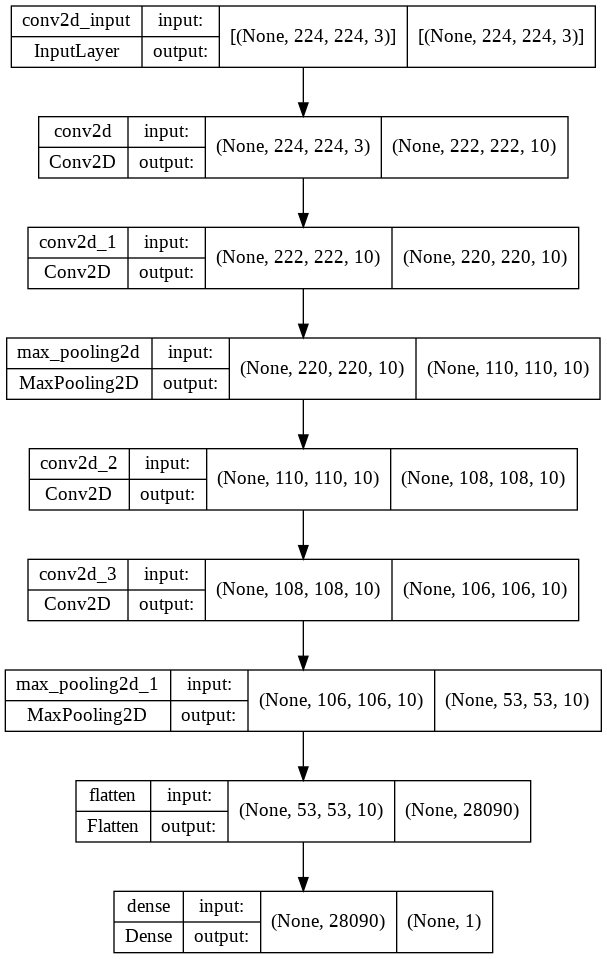

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes=True)

In [17]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 0.9211 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [19]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 2.9808 - accuracy: 0.6320 - val_loss: 0.7388 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.9602 - accuracy: 0.6847 - val_loss: 1.0290 - val_accuracy: 0.6220
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.5428 - accuracy: 0.7680 - val_loss: 0.4809 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6218 - accuracy: 0.7473 - val_loss: 0.4836 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.7941 - accuracy: 0.7213 - val_loss: 0.5266 - val_accuracy: 0.7660


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


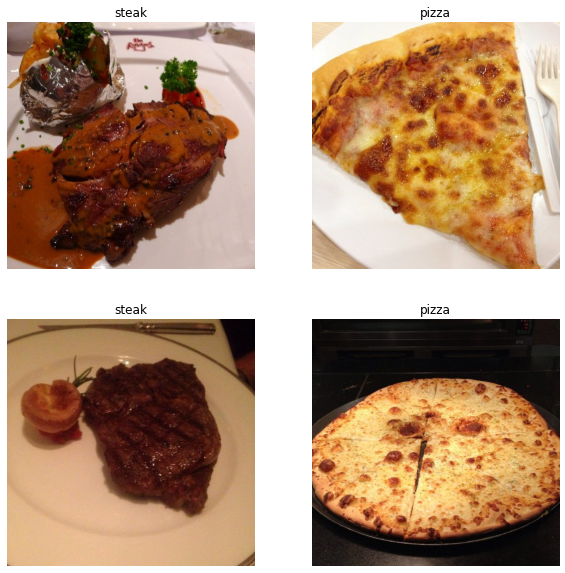

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(2,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")
plt.subplot(2,2,3)
steak_img_test = view_random_image("pizza_steak/test/", "steak")
plt.subplot(2,2,4)
pizza_img_test = view_random_image("pizza_steak/test/", "pizza")

In [22]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [24]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32
                                               )

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32
                                             )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [26]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [27]:
labels, labels.shape

(array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       dtype=float32), (32,))

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
model_4 = Sequential([
                      Conv2D(
                          filters=10,
                          kernel_size=3,
                          strides=1,
                          padding='valid',
                          activation='relu',
                          input_shape=(224, 224, 3)
                      ),
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

In [30]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [31]:
len(train_data), len(test_data)

(47, 16)

In [32]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 10s 202ms/step - loss: 1.5885 - accuracy: 0.5987 - val_loss: 0.5494 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4966 - accuracy: 0.7813 - val_loss: 0.4579 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3702 - accuracy: 0.8473 - val_loss: 0.3994 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.2262 - accuracy: 0.9227 - val_loss: 0.3868 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.0917 - accuracy: 0.9760 - val_loss: 0.6548 - val_accuracy: 0.7640


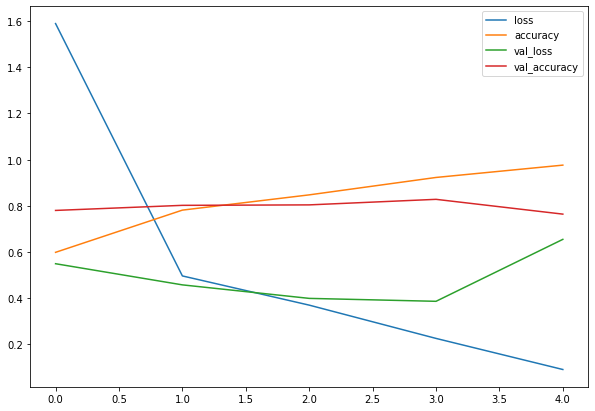

In [33]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [34]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='validation loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='validation accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

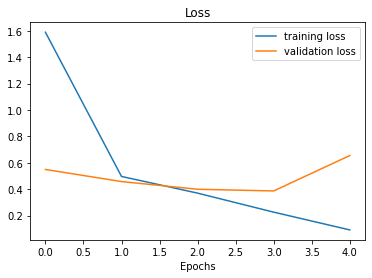

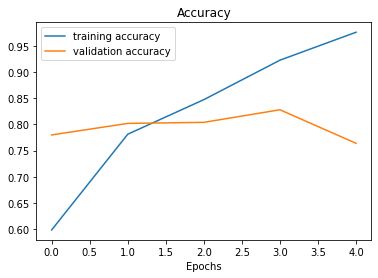

In [35]:
plot_loss_curves(history_4)

In [36]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_5 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

In [38]:
model_5.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [39]:
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.6223 - accuracy: 0.6393 - val_loss: 0.6037 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4678 - accuracy: 0.7907 - val_loss: 0.3748 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4348 - accuracy: 0.8153 - val_loss: 0.3453 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3954 - accuracy: 0.8293 - val_loss: 0.3648 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3874 - accuracy: 0.8267 - val_loss: 0.3281 - val_accuracy: 0.8600


In [40]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

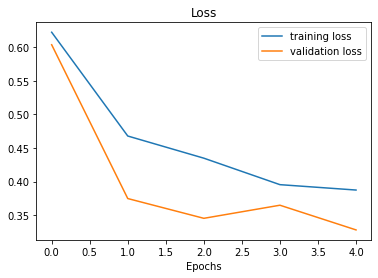

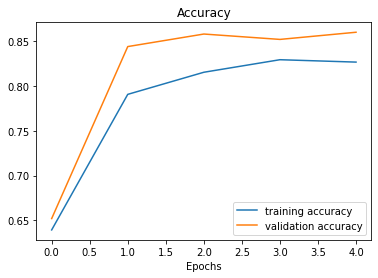

In [41]:
plot_loss_curves(history_5)

In [42]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [43]:
print("Augmented training Images:")
train_data_aug = train_datagen_augmented.flow_from_directory(train_dir,
                                                             target_size=(224,224),
                                                             batch_size=32,
                                                             class_mode='binary',
                                                             shuffle=False)

print("Non Augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged Test Images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary'
                                             )

Augmented training Images:
Found 1500 images belonging to 2 classes.
Non Augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged Test Images:
Found 500 images belonging to 2 classes.


In [44]:
images, labels = train_data.next()
aug_images, aug_labels = train_data_aug.next()

(-0.5, 223.5, 223.5, -0.5)

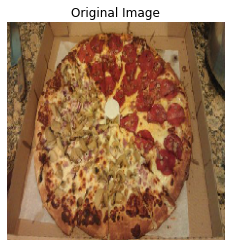

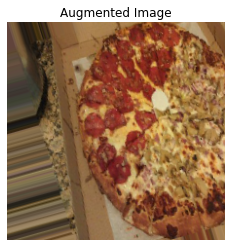

In [45]:
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [46]:
model_6 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_aug, 
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 22s 470ms/step - loss: 0.7942 - accuracy: 0.5507 - val_loss: 0.7178 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 464ms/step - loss: 0.7283 - accuracy: 0.5007 - val_loss: 0.6757 - val_accuracy: 0.5360
Epoch 3/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6842 - accuracy: 0.6520 - val_loss: 0.6727 - val_accuracy: 0.7120
Epoch 4/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6815 - accuracy: 0.6040 - val_loss: 0.6484 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6503 - accuracy: 0.6787 - val_loss: 0.5316 - val_accuracy: 0.8260


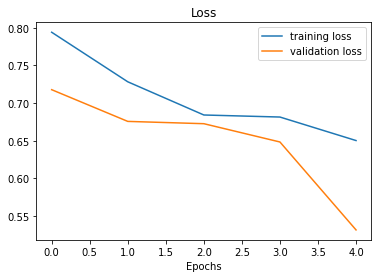

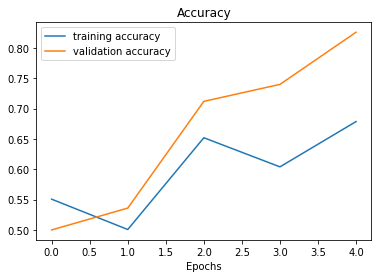

In [47]:
plot_loss_curves(history_6)

In [48]:
train_data_aug_shuf = train_datagen_augmented.flow_from_directory(train_dir,
                                                            target_size=(224, 224),
                                                            batch_size=32,
                                                            class_mode='binary',
                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [49]:
model_7 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')                      
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7= model_7.fit(train_data_aug_shuf,
              epochs=5,
              steps_per_epoch=len(train_data_aug_shuf),
              validation_data=test_data,
              validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 23s 476ms/step - loss: 0.6690 - accuracy: 0.5700 - val_loss: 0.6233 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 27s 578ms/step - loss: 0.6038 - accuracy: 0.6787 - val_loss: 0.5089 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 32s 676ms/step - loss: 0.5426 - accuracy: 0.7367 - val_loss: 0.3752 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 30s 644ms/step - loss: 0.4684 - accuracy: 0.7800 - val_loss: 0.3781 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 30s 645ms/step - loss: 0.4588 - accuracy: 0.7840 - val_loss: 0.3135 - val_accuracy: 0.8880


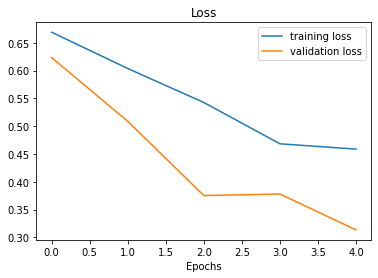

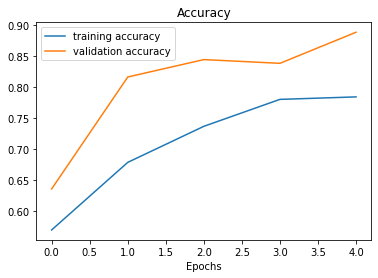

In [50]:
plot_loss_curves(history_7)

In [51]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_aug_shuf,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug_shuf),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 609ms/step - loss: 0.6564 - accuracy: 0.5627 - val_loss: 0.4833 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 30s 647ms/step - loss: 0.5352 - accuracy: 0.7353 - val_loss: 0.3886 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 31s 673ms/step - loss: 0.5096 - accuracy: 0.7507 - val_loss: 0.3774 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 34s 728ms/step - loss: 0.4807 - accuracy: 0.7760 - val_loss: 0.3879 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 31s 657ms/step - loss: 0.4801 - accuracy: 0.7747 - val_loss: 0.3743 - val_accuracy: 0.8440


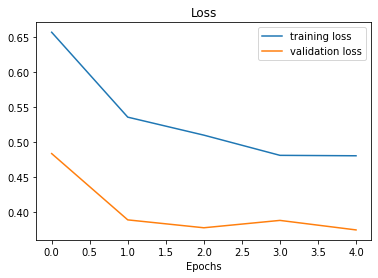

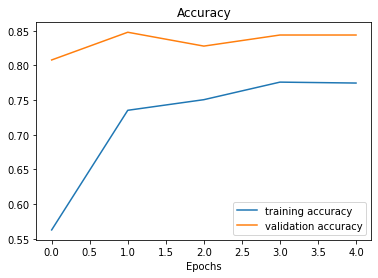

In [52]:
plot_loss_curves(history_8)

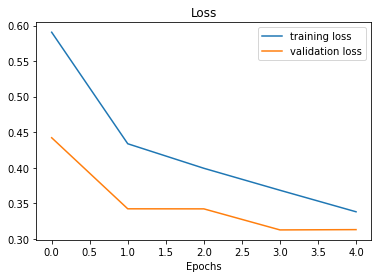

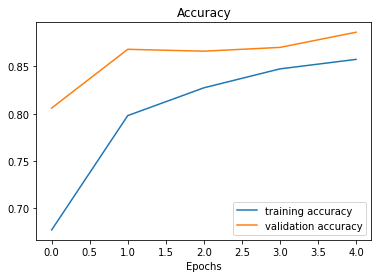

In [53]:
plot_loss_curves(history_1)

In [54]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [55]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [56]:
print(class_names)

['pizza' 'steak']


--2022-05-25 00:06:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-05-25 00:06:29 (31.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



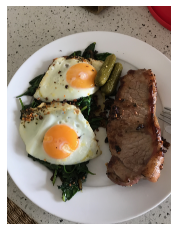

In [57]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [58]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [59]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [60]:
print(steak.shape)
steak = tf.expand_dims(steak, axis=0)
print(steak.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [61]:
pred = model_8.predict(steak)
pred

array([[0.91380477]], dtype=float32)

In [62]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [63]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [64]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

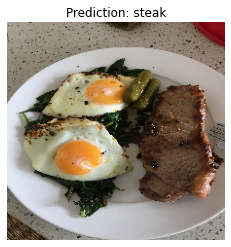

In [65]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2022-05-25 00:06:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-05-25 00:06:33 (40.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



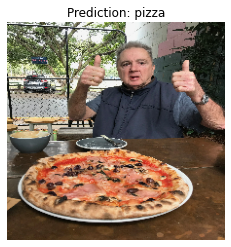

In [66]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

In [67]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-25 00:06:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.250.159.128, 142.251.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   129MB/s    in 4.0s    

2022-05-25 00:06:37 (123 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [68]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

there are 2 directories and 0 images in '10_food_classes_all_data'
there are 10 directories and 0 images in '10_food_classes_all_data/train'
there are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
there are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
there are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
there are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
there are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
there are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
there are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
there are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
there are 1

In [69]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [70]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [71]:
for item in data_dir.glob('*'):
  print(item, item.name) 

10_food_classes_all_data/train/sushi sushi
10_food_classes_all_data/train/pizza pizza
10_food_classes_all_data/train/chicken_curry chicken_curry
10_food_classes_all_data/train/fried_rice fried_rice
10_food_classes_all_data/train/ice_cream ice_cream
10_food_classes_all_data/train/grilled_salmon grilled_salmon
10_food_classes_all_data/train/chicken_wings chicken_wings
10_food_classes_all_data/train/ramen ramen
10_food_classes_all_data/train/hamburger hamburger
10_food_classes_all_data/train/steak steak


Image shape: (512, 512, 3)


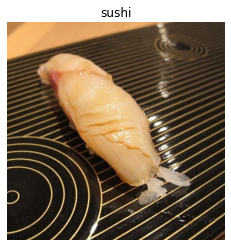

In [72]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation='softmax')

])

model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [78]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 233ms/step - loss: 2.1752 - accuracy: 0.1995 - val_loss: 2.0830 - val_accuracy: 0.2232
Epoch 2/5
235/235 [==============================] - 47s 200ms/step - loss: 1.9306 - accuracy: 0.3203 - val_loss: 1.9520 - val_accuracy: 0.3108
Epoch 3/5
235/235 [==============================] - 68s 288ms/step - loss: 1.6585 - accuracy: 0.4395 - val_loss: 1.9480 - val_accuracy: 0.3360
Epoch 4/5
235/235 [==============================] - 69s 296ms/step - loss: 1.1895 - accuracy: 0.5995 - val_loss: 2.3273 - val_accuracy: 0.2908
Epoch 5/5
235/235 [==============================] - 65s 276ms/step - loss: 0.6027 - accuracy: 0.8099 - val_loss: 2.8798 - val_accuracy: 0.2892


In [79]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 2.8798 - accuracy: 0.2892


[2.8797786235809326, 0.2892000079154968]

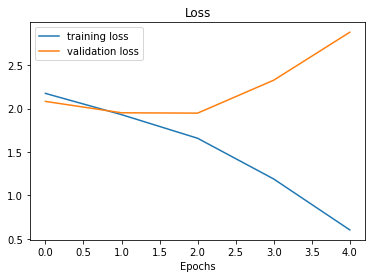

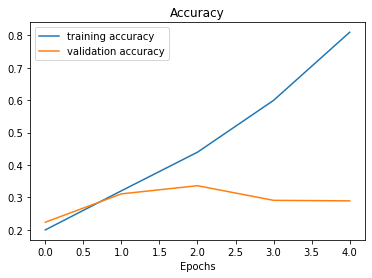

In [80]:
plot_loss_curves(history_9)

In [81]:
model_10 = Sequential([
                       Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                       MaxPool2D(),
                       Conv2D(10, 3, activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data)
                          )

Epoch 1/5
235/235 [==============================] - 47s 199ms/step - loss: 2.1578 - accuracy: 0.2416 - val_loss: 1.9603 - val_accuracy: 0.2992
Epoch 2/5
235/235 [==============================] - 43s 181ms/step - loss: 1.8148 - accuracy: 0.3765 - val_loss: 1.9746 - val_accuracy: 0.3064
Epoch 3/5
235/235 [==============================] - 43s 181ms/step - loss: 1.4463 - accuracy: 0.5192 - val_loss: 2.0365 - val_accuracy: 0.3192
Epoch 4/5
235/235 [==============================] - 43s 181ms/step - loss: 0.9585 - accuracy: 0.6965 - val_loss: 2.3589 - val_accuracy: 0.3108
Epoch 5/5
235/235 [==============================] - 53s 224ms/step - loss: 0.5353 - accuracy: 0.8436 - val_loss: 2.8940 - val_accuracy: 0.2864


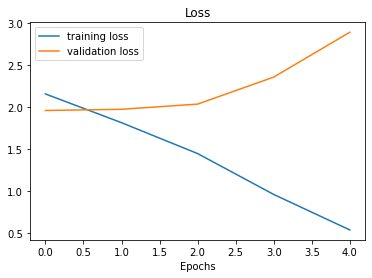

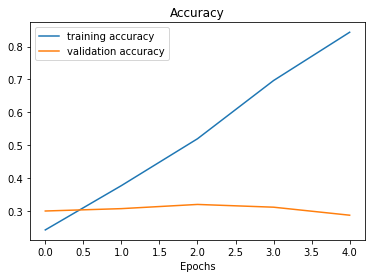

In [82]:
plot_loss_curves(history_10)

In [83]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [84]:
model_11 = tf.keras.models.clone_model(model_10)
model_11.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 123s 520ms/step - loss: 2.2863 - accuracy: 0.1704 - val_loss: 2.0808 - val_accuracy: 0.2600
Epoch 2/5
235/235 [==============================] - 137s 583ms/step - loss: 2.1037 - accuracy: 0.2501 - val_loss: 1.9793 - val_accuracy: 0.3016
Epoch 3/5
235/235 [==============================] - 140s 598ms/step - loss: 2.0495 - accuracy: 0.2764 - val_loss: 1.9354 - val_accuracy: 0.3172
Epoch 4/5
235/235 [==============================] - 107s 456ms/step - loss: 1.9970 - accuracy: 0.2948 - val_loss: 1.8800 - val_accuracy: 0.3580
Epoch 5/5
235/235 [==============================] - 107s 455ms/step - loss: 1.9788 - accuracy: 0.3148 - val_loss: 1.8037 - val_accuracy: 0.3852


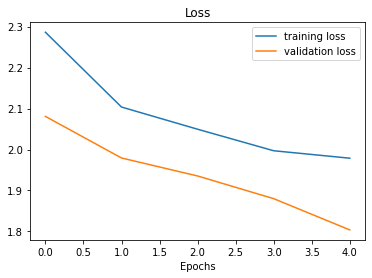

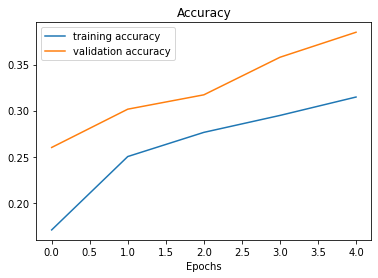

In [85]:
plot_loss_curves(history_11)

In [86]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [87]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

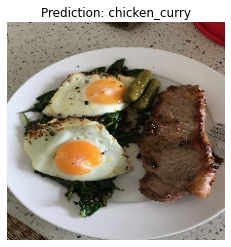

In [88]:
pred_and_plot(model=model_11,
              filename='03-steak.jpeg',
              class_names=class_names)

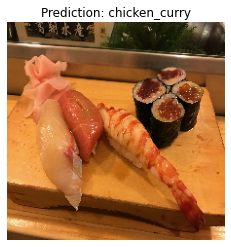

In [89]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

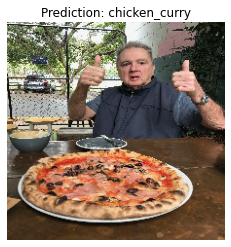

In [90]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

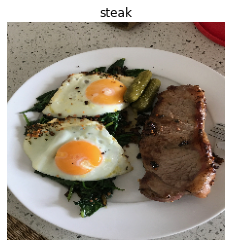

In [91]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [92]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

array([[0.02584984, 0.09275599, 0.02596253, 0.27890697, 0.09358104,
        0.03415979, 0.02253362, 0.0372873 , 0.32651705, 0.06244585]],
      dtype=float32)

In [93]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

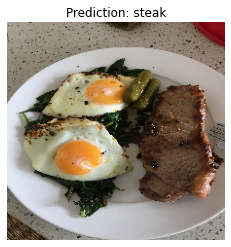

In [94]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

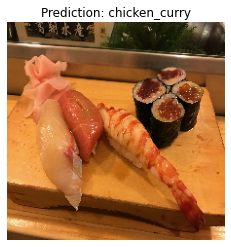

In [95]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

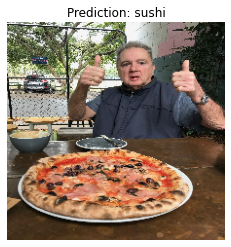

In [96]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

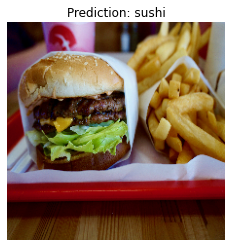

In [97]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

In [98]:
model_11.save("saved_training_model")

INFO:tensorflow:Assets written to: saved_training_model/assets


In [99]:
loaded_model_11 = tf.keras.models.load_model("saved_training_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 1.8037 - accuracy: 0.3852


[1.80369234085083, 0.38519999384880066]

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import inspect
print(dir(ImageDataGenerator))
print(inspect.getsource(ImageDataGenerator.flow_from_directory))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_keras_api_names', '_keras_api_names_v1', 'apply_transform', 'fit', 'flow', 'flow_from_dataframe', 'flow_from_directory', 'get_random_transform', 'random_transform', 'standardize']
  def flow_from_directory(self,
                          directory,
                          target_size=(256, 256),
                          color_mode='rgb',
                          classes=None,
                          class_mode='categorical',
                          batch_size=32,
                          shuffle=True,
                          seed=None,
                          save_to_dir=None,
                          save_prefix='',
              